# Spectral Analysis for paper

Here, we generate all the Swordfish objects for 4 rocks: Zabuyelite, Sylvanite, Sinjarite and Olivine.

We then calculate information fluxes, upper limits and discovery reaches for all of them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from tqdm import tqdm
import swordfish as sf
from WIMpy import DMUtils as DMU
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz, quad
from scipy.special import erf
from paleo.paleopy_classes import *
import paleo.paleopy as paleopy

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=16)
#mpl.rcParams.update({'font.size': 16,'font.family':'serif'})

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

#%matplotlib inline

#### Load in the relevant rocks

In [2]:
# Zab = Mineral("Zabuyelite")
# Syl = Mineral("Sylvanite")
# Phlo = Mineral("Phlogopite")
Hal = Mineral("Halite")
Nch = Mineral("Nchwaningite")
Sinj = Mineral("Sinjarite")
Oliv = Mineral("Olivine")
#Gyp = Mineral("Gypsum")

#### Generate SwordFish objects for all the rocks

In [3]:
def MakeSF(mineral, sigma, exposure):
    xb = paleopy.calcBins_1nm()
    systematics = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1e-2, 1e-2]
#     if sigma == 1.0:
#         dRdx_BG = paleopy.GetBackground(mineral, sigma=sigma, x_bins=xb)
#         print(np.shape(dRdx_BG))
#     else:
#         print('here which is bad')
#         dRdx_BG = paleopy.GetBackground(mineral, sigma)
    dRdx_BG = paleopy.GetBackground(mineral, sigma)
    SF = sf.Swordfish(dRdx_BG, T=systematics, E=np.ones_like(dRdx_BG[0])*exposure)
    return SF

This will probably take 4-5 minutes...

In [4]:
# print("Catching some SwordFish with Zabuyelite...")
# SF_Zab_1nm = MakeSF(Zab, 1.0, 1.0)
# SF_Zab_15nm = MakeSF(Zab, 15.0, 100.0)
# print("...done.")

# print("Catching some SwordFish with Sylvanite...")
# SF_Syl_1nm = MakeSF(Syl, sigma=1.0, x_bins=xb)
# SF_Syl_15nm = MakeSF(Syl, 15.0, 100.0)
# print("...done.")

# print("Catching some SwordFish with Phlogopite...")
# SF_Phlo_1nm = MakeSF(Phlo, 1.0, 1.0)
# SF_Phlo_15nm = MakeSF(Phlo, 15.0, 100.0)
# print("...done.")

print("Catching some SwordFish with Halite...")
SF_Hal_1nm = MakeSF(Hal, 1.0, 1.0)
SF_Hal_15nm = MakeSF(Hal, 15.0, 100.0)
print("...done.")

print("Catching some SwordFish with Nchwaningite...")
SF_Nch_1nm = MakeSF(Nch, 1.0, 1.0)
SF_Nch_15nm = MakeSF(Nch, 15.0, 100.0)
print("...done.")

print("Catching some SwordFish with Sinjarite...")
SF_Sinj_1nm = MakeSF(Sinj, 1.0, 1.0)
SF_Sinj_15nm = MakeSF(Sinj, 15.0, 100.0)
print("...done.")

print("Catching some SwordFish with Olivine...")
SF_Oliv_1nm = MakeSF(Oliv, 1.0, 1.0)
SF_Oliv_15nm = MakeSF(Oliv, 15.0, 100.0)
print("...done.")

Catching some SwordFish with Halite...
 DMutils.py: Loading neutrino flux for the first time...
Loading neutrino fluxes for...
    DSNB
    atm
    hep
    8B
    15O
    17F
    pep
    13N
    pp
    7Be-384
    7Be-861
...done.


/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


...done.
Catching some SwordFish with Nchwaningite...
...done.
Catching some SwordFish with Sinjarite...
...done.
Catching some SwordFish with Olivine...
...done.


------------------
## Calculating information flux

In [5]:
def GetInformationFlux(mineral, m_x, sigma_x, exposure, SF):
    ref_sig = 1e-45
#     if sigma_x == 1.0:
#         sig = paleopy.GetSignal(mineral, sigma = sigma_x, m_DM = m_x, xsec = ref_sig, x_bins=xb)
#     else:
    sig = paleopy.GetSignal(mineral, sigma = sigma_x, m_DM=m_x, xsec=ref_sig)
    flux = SF.infoflux(sig)
    
    return flux

In [6]:
def PlotInformationFlux(mineral, sigma_x, exposure, SF):
    mlist = [5, 50, 500]
    
    flux = [GetInformationFlux(mineral, mx, sigma_x, exposure, SF) for mx in mlist]    
    
    plt.figure(figsize=(7,5))

    ax = plt.gca()

    ax.set_xscale("log")
    ax.set_yscale("log")

    for i in range(3):
#         if sigma_x == 1.0:
#             ax.step(xb[:-1] + np.diff(xb)/2., flux[i], label=r'$m_\chi = ' + str(mlist[i]) + " $ GeV")
#         else:
        ax.step(paleopy.calcBins(sigma_x)[:-1] + sigma_x/2., flux[i], label=r'$m_\chi = ' + str(mlist[i]) + " $ GeV")

    plt.xlabel("$x_T ~[\mathrm{nm}]$")
    plt.ylabel("Information Flux [A.U.]")

    plt.title(mineral.name)

    labtext = r'$\sigma_{x_T} = ' + str(int(sigma_x)) + '\,\mathrm{nm}; \,\,\epsilon = ' + str(int(exposure)) + '\,\mathrm{kg}\,\mathrm{Myr}$'
    plt.text(0.05, 0.9, labtext, fontsize=16, ha='left',transform=ax.transAxes)

    plt.legend(fontsize=14,loc='lower left')

    plt.xlim(1, 1000)
    plt.ylim(1e-6, 1000.05)

    outfile = '../plots/InfoFlux_' + mineral.name + '_exp' + str(exposure) + '_sig' + str(sigma_x) + '.pdf'

    plt.savefig(outfile, bbox_inches="tight")

    plt.show()


Plotting all the information fluxes...

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


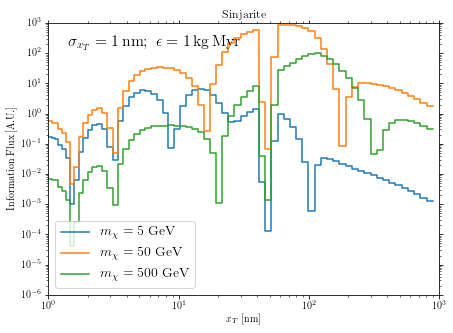

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


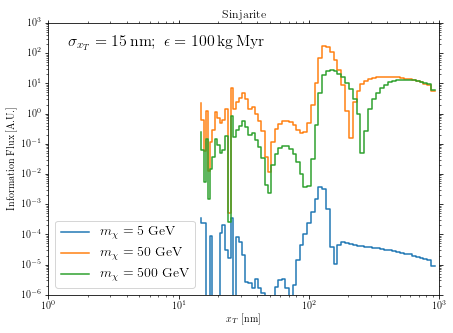

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


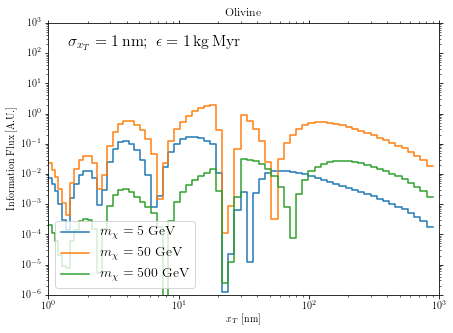

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


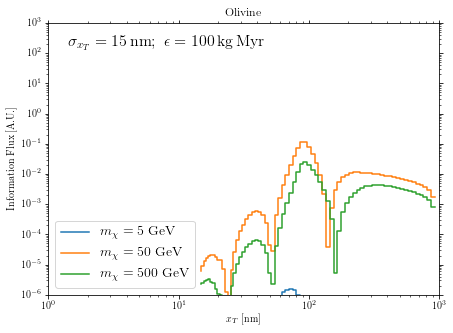

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


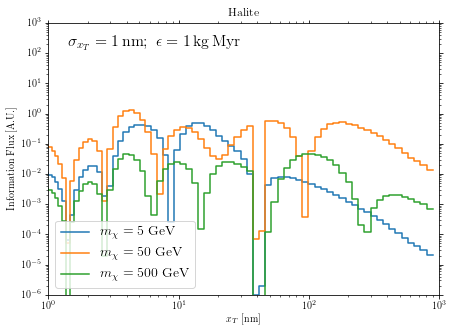

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


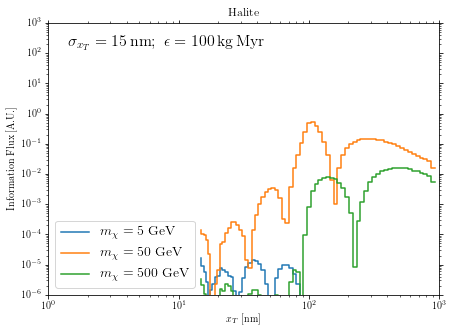

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


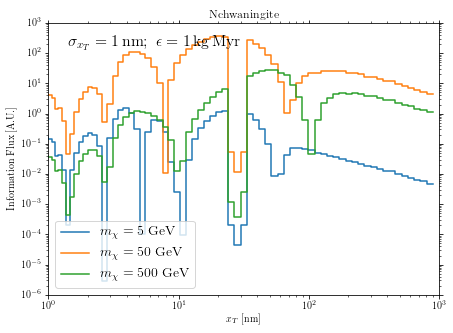

/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


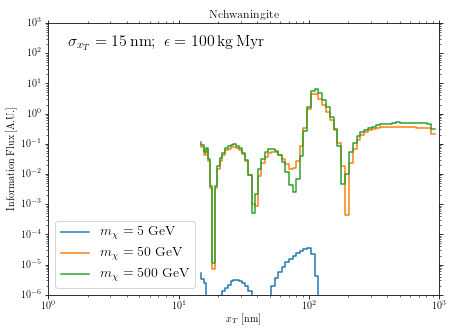

In [7]:
PlotInformationFlux(Sinj, 1.0, 1.0, SF_Sinj_1nm)
PlotInformationFlux(Sinj, 15.0, 100.0, SF_Sinj_15nm)

PlotInformationFlux(Oliv, 1.0, 1.0, SF_Oliv_1nm)
PlotInformationFlux(Oliv, 15.0, 100.0, SF_Oliv_15nm)

# PlotInformationFlux(Phlo, 1.0, 1.0, SF_Phlo_1nm)
# PlotInformationFlux(Phlo, 15.0, 100.0, SF_Phlo_15nm)

PlotInformationFlux(Hal, 1.0, 1.0, SF_Hal_1nm)
PlotInformationFlux(Hal, 15.0, 100.0, SF_Hal_15nm)

PlotInformationFlux(Nch, 1.0, 1.0, SF_Nch_1nm)
PlotInformationFlux(Nch, 15.0, 100.0, SF_Nch_15nm)

# PlotInformationFlux(Zab, 1.0, 1.0, SF_Zab_1nm)
# PlotInformationFlux(Zab, 15.0, 100.0, SF_Zab_15nm)

------------------
## Calculating projected limits and discovery reaches

(and saving tables to file...)

In [8]:
def GetLimitandDR(mineral, sigma, exposure, SF, mlist):
    ref_sig = 1e-45

    limit_list = np.zeros_like(mlist)
    DR_list = np.zeros_like(mlist)
    
    for i, m in enumerate(mlist):
#         if sigma == 1.0:
#             sig = paleopy.GetSignal(mineral, sigma = sigma, m_DM = m, xsec = ref_sig, x_bins=xb)
#         else:
        sig = paleopy.GetSignal(mineral, sigma, m_DM=m, xsec=ref_sig)
        UL = SF.upperlimit(sig, 0.1)
        DR = SF.discoveryreach(sig, 2.87e-7)
        limit_list[i] = ref_sig * UL
        DR_list[i] = ref_sig * DR
        
    np.savetxt('../ES/limits/lims_' + mineral.shortname +  '_exp' + str(exposure) + '_res' + str(sigma) + '.txt', list(zip(mlist, limit_list, DR_list)),
                header="Mineral: " + mineral.name + "; Exposure [kg Myr]: " + str(exposure) + "; sigma [nm]:" + str(sigma) + "\nColumns: m [GeV], 95% upper limit [cm^2], 5-sig discovery reach [cm^2]")
    return limit_list, DR_list

In [9]:
recalculate = True

Calculating for high resolution case:

In [10]:
if (recalculate):

    mlist = np.logspace(-0.5,4,num=100)

    SF_list = [SF_Nch_1nm, SF_Oliv_1nm, SF_Sinj_1nm, SF_Hal_1nm]
    mineral_list = [Nch, Oliv, Sinj, Hal]
    for mineral,SF in zip(mineral_list, SF_list):
        print("Calculating for " + mineral.name + "...")
        lim, dr = GetLimitandDR(mineral, sigma=1.0, exposure=1.0, SF=SF, mlist=mlist)

Calculating for Nchwaningite...


/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 

Calculating for Olivine...
Calculating for Sinjarite...
Calculating for Halite...


Calculating for low resolution case:

In [11]:
if (recalculate):
    mlist = np.logspace(-0.5,4,num=100)

    SF_list = [SF_Nch_15nm, SF_Oliv_15nm, SF_Sinj_15nm, SF_Hal_15nm]
    mineral_list = [Nch, Oliv, Sinj, Hal]
    for mineral,SF in zip(mineral_list, SF_list):
        print("Calculating for " + mineral.name + "...")
        lim, dr = GetLimitandDR(mineral, sigma=15.0, exposure=100.0, SF=SF, mlist=mlist)

Calculating for Nchwaningite...


/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
 

Calculating for Olivine...
Calculating for Sinjarite...
Calculating for Halite...


------------------
## Plotting projected limits and discovery reaches

(and saving tables to file...)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


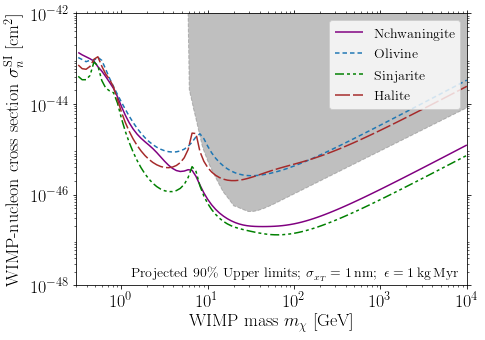

In [33]:
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)
plt.figure(figsize=(7,5))

colors = ['Purple','C0', 'g', 'Brown']

dashes=[[3, 0],
        [3, 2],
        [6, 2, 2, 2,2,2],
        [10,2]]

m_curr, sig_curr = np.loadtxt("../Data/CurrentLimits.txt", unpack=True)
plt.fill_between(m_curr, sig_curr, 1e-35, linestyle='--', color='grey', alpha=0.5)

for mineral,col,dash in zip([Nch, Oliv, Sinj, Hal],colors,dashes):
    mlist, lim, dr = np.loadtxt('../ES/limits/lims_' + mineral.shortname + '_exp1.0_res1.0.txt', unpack=True)
    plt.loglog(mlist, lim, label=mineral.name,color=col, dashes=dash)

plt.ylim(1e-48, 1e-42)
plt.xlim(0.3, 1e4)
plt.yticks([1e-48, 1e-46, 1e-44, 1e-42])
    
    
plt.legend(fontsize=14,loc='upper right')

plt.xlabel(r'WIMP mass $m_\chi$ [GeV]')
plt.ylabel(r'WIMP-nucleon cross section $\sigma_n^{\mathrm{SI}}$ [cm$^2$]')

plt.text(8e3, 1.3e-48, r'Projected $90\%$ Upper limits; $\sigma_{x_T} = 1\,\mathrm{nm}; \,\,\epsilon = 1 \,\mathrm{kg}\,\mathrm{Myr}$', fontsize=14, ha='right')

plt.savefig('../plots/limits90_exp1.0_sig1.0.pdf', bbox_inches="tight")

plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


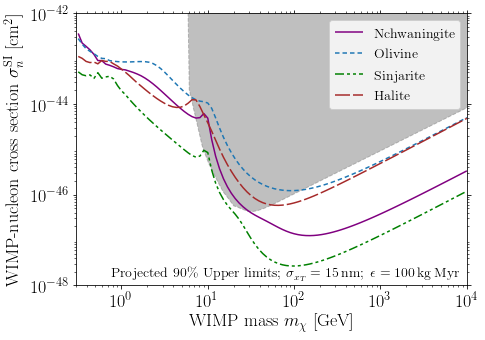

In [34]:
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)
plt.figure(figsize=(7,5))

colors = ['Purple','C0', 'g', 'Brown']

dashes=[[3, 0],
        [3, 2],
        [6, 2, 2, 2,2,2],
        [10,2]]
          
m_curr, sig_curr = np.loadtxt("../Data/CurrentLimits.txt", unpack=True)
plt.fill_between(m_curr, sig_curr, 1e-35, linestyle='--', color='grey', alpha=0.5)
    
for mineral,col,dash in zip([Nch, Oliv, Sinj, Hal],colors,dashes):
    mlist, lim, dr = np.loadtxt('../ES/limits/lims_' + mineral.shortname + '_exp100.0_res15.0.txt', unpack=True)
    plt.loglog(mlist, lim, label=mineral.name,color=col, dashes=dash)

plt.ylim(1e-48, 1e-42)
plt.xlim(0.3, 1e4)
plt.yticks([1e-48, 1e-46, 1e-44, 1e-42])
    
    
plt.legend(fontsize=14,loc='upper right')

plt.xlabel(r'WIMP mass $m_\chi$ [GeV]')
plt.ylabel(r'WIMP-nucleon cross section $\sigma_n^{\mathrm{SI}}$ [cm$^2$]')

plt.text(8e3, 1.3e-48, r'Projected $90\%$ Upper limits; $\sigma_{x_T} = 15\,\mathrm{nm}; \,\,\epsilon = 100 \,\mathrm{kg}\,\mathrm{Myr}$', fontsize=14, ha='right')

plt.savefig('../plots/limits90_exp100.0_sig15.0.pdf', bbox_inches="tight")

plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


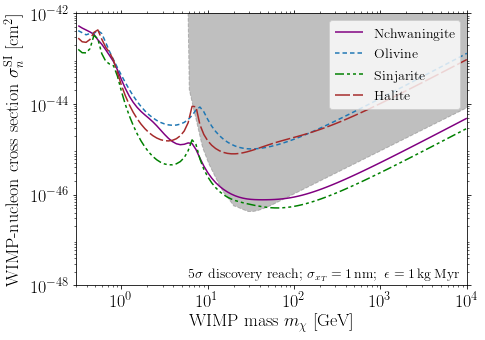

In [35]:
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)
plt.figure(figsize=(7,5))

colors = ['Purple','C0', 'g', 'Brown']

dashes=[[3, 0],
        [3, 2],
        [6, 2, 2, 2,2,2],
        [10,2]]
          
m_curr, sig_curr = np.loadtxt("../Data/CurrentLimits.txt", unpack=True)
plt.fill_between(m_curr, sig_curr, 1e-35, linestyle='--', color='grey', alpha=0.5)
    
for mineral,col,dash in zip([Nch, Oliv, Sinj, Hal],colors,dashes):
    mlist, lim, dr = np.loadtxt('../ES/limits/lims_' + mineral.shortname + '_exp1.0_res1.0.txt', unpack=True)
    plt.loglog(mlist, dr, label=mineral.name,color=col, dashes=dash)

plt.ylim(1e-48, 1e-42)
plt.xlim(0.3, 1e4)
plt.yticks([1e-48, 1e-46, 1e-44, 1e-42])
    
    
plt.legend(fontsize=14,loc='upper right')

plt.xlabel(r'WIMP mass $m_\chi$ [GeV]')
plt.ylabel(r'WIMP-nucleon cross section $\sigma_n^{\mathrm{SI}}$ [cm$^2$]')

plt.text(8e3, 1.3e-48, r'$5\sigma$ discovery reach; $\sigma_{x_T} = 1\,\mathrm{nm}; \,\,\epsilon = 1 \,\mathrm{kg}\,\mathrm{Myr}$', fontsize=14, ha='right')

plt.savefig('../plots/discovery_exp1.0_sig1.0.pdf', bbox_inches="tight")

plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


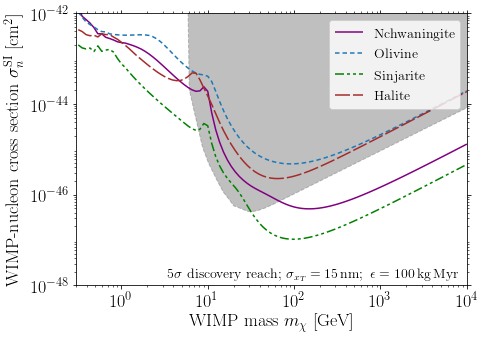

In [36]:
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)
plt.figure(figsize=(7,5))

colors = ['Purple','C0', 'g', 'Brown']

dashes=[[3, 0],
        [3, 2],
        [6, 2, 2, 2,2,2],
        [10,2]]
    
m_curr, sig_curr = np.loadtxt("../Data/CurrentLimits.txt", unpack=True)
plt.fill_between(m_curr, sig_curr, 1e-35, linestyle='--', color='grey', alpha=0.5)
    
for mineral,col,dash in zip([Nch, Oliv, Sinj, Hal],colors,dashes):
    mlist, lim, dr = np.loadtxt('../ES/limits/lims_' + mineral.shortname + '_exp100.0_res15.0.txt', unpack=True)
    plt.loglog(mlist, dr, label=mineral.name,color=col, dashes=dash)

plt.ylim(1e-48, 1e-42)
plt.xlim(0.3, 1e4)
plt.yticks([1e-48, 1e-46, 1e-44, 1e-42])
    
    
plt.legend(fontsize=14,loc='upper right')

plt.xlabel(r'WIMP mass $m_\chi$ [GeV]')
plt.ylabel(r'WIMP-nucleon cross section $\sigma_n^{\mathrm{SI}}$ [cm$^2$]')

plt.text(8e3, 1.3e-48, r'$5\sigma$ discovery reach; $\sigma_{x_T} = 15\,\mathrm{nm}; \,\,\epsilon = 100 \,\mathrm{kg}\,\mathrm{Myr}$', fontsize=14, ha='right')

plt.savefig('../plots/discovery_exp100.0_sig15.0.pdf', bbox_inches="tight")

plt.show()